In [46]:
import json
import pandas as pd
import seaborn as sns
path=''
result_path='results_config_spacy_tr_model_full_data_corrected_entities_cross_validation/'

pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)

In [47]:
f = 'intent_report.json'

with open(path+ result_path+ f) as json_file:
    results  = json.load(json_file)
    

In [48]:
results

{'tr_test_stay_in_china': {'precision': 0.7777777777777778,
  'recall': 0.84,
  'f1-score': 0.8076923076923077,
  'support': 25,
  'confused_with': {'tr_prevention_medical_attention': 1,
   'tr_vocative_call': 1}},
 'tr_covid_preexisting_illness': {'precision': 0.85,
  'recall': 0.6538461538461539,
  'f1-score': 0.7391304347826088,
  'support': 26,
  'confused_with': {'tr_covid_risk_people': 3, 'tr_covid_dangerous': 2}},
 'tr_covid_pregnancy': {'precision': 0.84,
  'recall': 0.875,
  'f1-score': 0.8571428571428572,
  'support': 24,
  'confused_with': {'tr_covid_risk_people': 2, 'tr_covid_dangerous': 1}},
 'tr_bot_capabilities': {'precision': 0.5087719298245614,
  'recall': 0.6304347826086957,
  'f1-score': 0.5631067961165049,
  'support': 46,
  'confused_with': {'tr_bot_personal_questions': 3,
   'tr_current_situation': 2}},
 'tr_germany_neighbors_close_borders': {'precision': 0.75,
  'recall': 0.7777777777777778,
  'f1-score': 0.7636363636363638,
  'support': 27,
  'confused_with': {'

In [49]:
metric_lst=[]
confused_lst=[]
accuracy = results['accuracy']
averages_lst = []

for k in ['macro avg', 'weighted avg']:
    v=results[k]
    averages_lst.append(['macro avg', v['precision'], v['recall'], v['f1-score'], v['support']])


for k, v in results.items():
    if k not in ['accuracy','macro avg', 'weighted avg']:
        metric_lst.append([k, v['precision'], v['recall'], v['f1-score'], v['support']])
        for i, c in v['confused_with'].items():
            confused_lst.append([k, i, c])


In [50]:
print('accuracy', accuracy)

accuracy 0.7744107744107744


In [51]:
averages = pd.DataFrame(averages_lst, columns = ['intent', 'precision', 'recall', 'f1-score', 'support'])
metrics = pd.DataFrame(metric_lst, columns = ['intent', 'precision', 'recall', 'f1-score', 'support'])
confusion = pd.DataFrame(confused_lst, columns = ['intent', 'confused_with', 'cnt'])

In [52]:
averages

,intent,precision,recall,f1-score,support
0,macro avg,0.775114,0.749046,0.758696,7722
1,macro avg,0.778314,0.774411,0.774229,7722


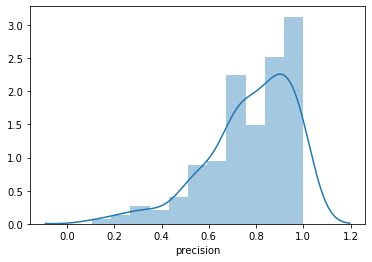

In [53]:
sns.distplot(metrics.precision)

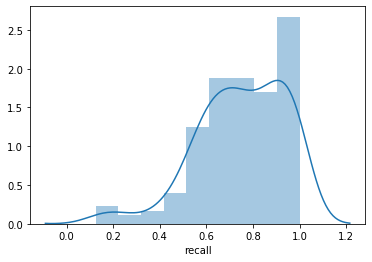

In [54]:
sns.distplot(metrics.recall)

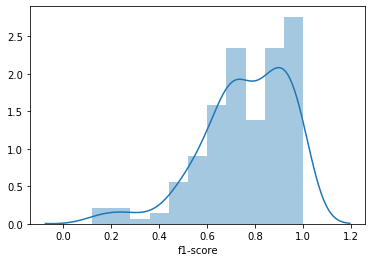

In [55]:
sns.distplot(metrics['f1-score'])

In [56]:
metrics [metrics.recall<0.5].sort_values('support',ascending=False)

,intent,precision,recall,f1-score,support
94,tr_bot_personal_questions,0.379310,0.397590,0.388235,83
41,tr_greeting_goodbye,0.517857,0.491525,0.504348,59
48,tr_user_angry,0.195652,0.200000,0.197802,45
16,tr_userfeeling_negative,0.105263,0.139535,0.120000,43
160,tr_quarantine_dos_and_donts,0.500000,0.441860,0.469136,43
79,tr_quarantine_general,0.435897,0.472222,0.453333,36
70,tr_userfeeling_happy,0.281250,0.272727,0.276923,33
118,tr_vocative_you_welcome,0.333333,0.333333,0.333333,30
107,tr_comment_smart,0.500000,0.448276,0.472727,29
10,tr_covid_crisis_howlong,0.687500,0.440000,0.536585,25


In [57]:
confusion.sort_values('cnt', ascending=False)

,intent,confused_with,cnt
27,tr_userfeeling_negative,tr_user_angry,25
84,tr_user_angry,tr_userfeeling_negative,23
36,tr_quarantine_how_it_works,tr_quarantine_general,16
136,tr_quarantine_general,tr_quarantine_how_it_works,16
298,tr_cc_religion,tr_cc_philosophical,14
192,tr_bot_sexual,tr_comment_offense,12
51,tr_cc_philosophical,tr_cc_religion,11
86,tr_germany_current_situation,tr_current_situation,10
256,tr_comment_offense,tr_bot_sexual,10
187,tr_comment_smart,tr_comment_positive,9


In [58]:
confusion.groupby('intent').cnt.sum().reset_index().sort_values('cnt', ascending=False)

,intent,cnt
148,tr_userfeeling_negative,27
141,tr_user_angry,26
29,tr_cc_philosophical,20
108,tr_quarantine_how_it_works,19
107,tr_quarantine_general,18
17,tr_bot_sexual,18
31,tr_cc_religion,18
69,tr_germany_current_situation,17
34,tr_comment_offense,15
13,tr_bot_personal_questions,14


In [36]:
import spacy
nlp= spacy.load('tr_model')

In [38]:
text = "İtalya'ya olan biletimi ücretsiz olarak iade edebilir miyim?"
text = "İtalya'dan mi geliyorsun."
doc = nlp(text)

tok_exp = nlp.tokenizer.explain(text)
for t in tok_exp:
    print(t[1], "\t", t[0])



İtalya'dan 	 TOKEN
mi 	 TOKEN
geliyorsun 	 TOKEN
. 	 SUFFIX
